# Intro to Python for Financial Market Data

Most finance websites show quotes or charts for various financial markets. Where is this data freely available and how can we download it, wrangle it into a useable format, and visualize it ourselves?

A quote for a financial instrument like a stock, currency, or commodity  is a snapshot in time reflecting the sum of individual trades happening on the market for this instrument. Data points like price or trading volume are collected periodically to form a historical time series. If we chart this time series, we can visualize the activity of individual instruments,  or the market as a whole with an index, and gain a quick overview, and perhaps some insights into the data.

Python is an excellent language for working with this kind of financial market data. The syntax is compact and helpful for exploratory data analysis using an interactive shell like iPython. This also makes it easy to capture ideas quickly, and concisely display code and data in a logbook format like a Jupyter Notebook. There is also strong support for downloading, manipulating, and visualizing financial market data through popular open source libraries like Pandas and Matplotlib.

## Fetching and Exploring Data

In [28]:
# Download free end of day historical stock data
# Use pandas-datareader and Yahoo finance
from datetime import datetime
import pandas_datareader as pdr

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
df = pdr.get_data_yahoo('SPY', start, end)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-16,255.210007,255.509995,254.820007,255.289993,255.289993,38221700
2017-10-17,255.229996,255.520004,254.979996,255.470001,255.470001,31561000
2017-10-18,255.899994,255.949997,255.500000,255.720001,255.720001,40888300
2017-10-19,254.830002,255.830002,254.350006,255.789993,255.789993,61903800
2017-10-20,256.700012,257.140015,255.770004,257.109985,257.109985,82477300


The above is a Pandas DataFrame, a two-dimensional tabular, column-oriented data structure with rich, high-performance time series functionality built on top of NumPy's array-computing features. A DataFrame provides many of the capabilities of a spreadsheet and relational database with flexible handling of missing data and integration with Matplotlib for visualization.

In [29]:
# summary statistics accross the whole DataFrame
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,198.976081,199.786065,198.090239,199.021717,189.901637,1.084079e+08
std,27.420185,27.392707,27.440104,27.424731,31.270607,4.908361e+07
min,135.899994,136.490005,134.699997,135.699997,122.511452,3.156100e+07
25%,182.962494,183.642505,181.845005,182.922497,169.699688,7.428145e+07
50%,202.840004,203.855004,201.740005,203.114998,193.377548,9.750890e+07
75%,213.127498,214.035003,212.500000,213.164997,208.331898,1.310476e+08
max,256.700012,257.140015,255.770004,257.109985,257.109985,5.072443e+08


Slicing a DataFrame's column yields a Series that can be operated on alone as seen below.

In [30]:
# Closing price for most recent 5 trading days
df['Close'].tail()

Date
2017-10-16    255.289993
2017-10-17    255.470001
2017-10-18    255.720001
2017-10-19    255.789993
2017-10-20    257.109985
Name: Close, dtype: float64

In [31]:
# volume statistics
vol = df['Volume']
print("Min: %s Max: %s Average: %s" % (vol.min(), vol.max(), vol.mean()))

Min: 31561000 Max: 507244300 Average: 108407877.34499206


A wrapper around [Matplotlib](http://matplotlib.org/) produces preformatted two-dimensional charts.

## Charting and Visualiation

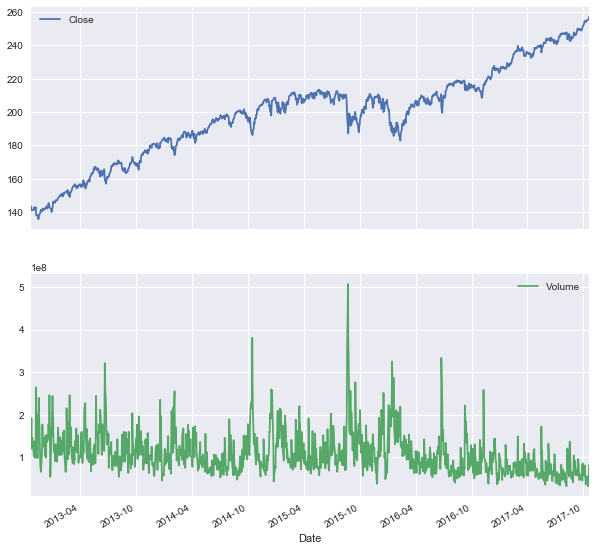

In [32]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

# plot the historical closing prices and volume using matplotlib
plots = df[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

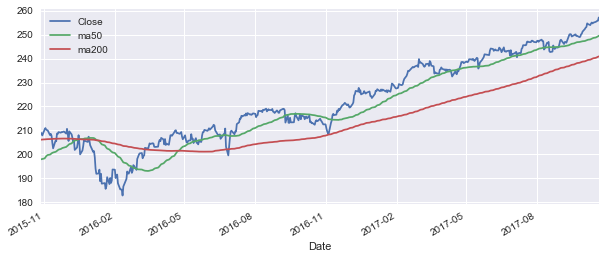

In [33]:
# chart a basic 50 period moving average of the closing price
import pandas as pd
df['ma50'] = df.Close.rolling(window=50).mean()
df['ma200'] = df.Close.rolling(window=200).mean()
data = df[['Close', 'ma50', 'ma200']][-500:]
plots = data.plot(subplots=False,figsize=(10, 4))
plt.show()

## References
* [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](http://amzn.to/2zG3dM4)
* [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)
* [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Seaborn](http://seaborn.pydata.org/)